### 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from Kaggle. The data contains the following fields:

- lat : String variable, Latitude
- lng: String variable, Longitude
- desc: String variable, Description of the Emergency Call
- zip: String variable, Zipcode
- title: String variable, Title
- timeStamp: String variable, YYYY-MM-DD HH:MM:SS
- twp: String variable, Township
- addr: String variable, Address
- e: String variable, Dummy variable (always 1)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./datasets/911.csv")

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=663522, step=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [12]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### What are the top 5 zipcodes for 911 calls

In [ ]:
df['zip'].value_counts().head()

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

#### What are the top 5 townships(twp) for 911 calls

In [22]:
df['twp'].value_counts().head()

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

#### Take a look at the 'title' column, how many unique title codes are there?

In [29]:
df['title'].nunique()

148

### Creating new features

In [31]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### What is the most common Reason for a 911 call based off of this new column

In [35]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

#### Use seaborn to create countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

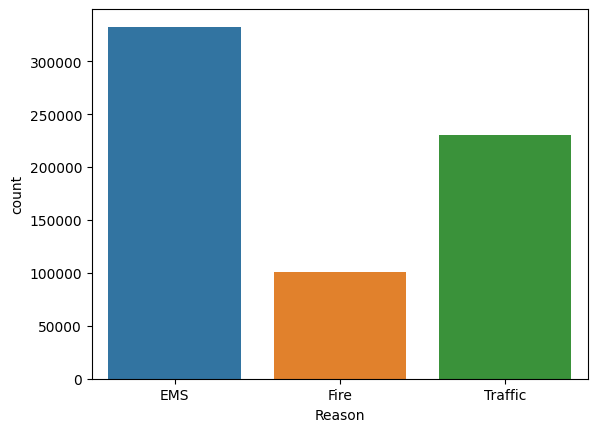

In [39]:
sns.countplot(x='Reason',data=df,hue="Reason")

#### What is the data type of the objects in the timeStamp column

In [42]:
df['timeStamp'].dtype # - Object

dtype('O')

In [43]:
df['timeStamp'].head()

0    2015-12-10 17:10:52
1    2015-12-10 17:29:21
2    2015-12-10 14:39:21
3    2015-12-10 16:47:36
4    2015-12-10 16:56:52
Name: timeStamp, dtype: object

#### Lets convert timeStamp column type from object to datatime

In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [46]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 663522 entries, 0 to 663521
Series name: timeStamp
Non-Null Count   Dtype         
--------------   -----         
663522 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.1 MB


#### Now, we can grab specific parts in the timeStamp

In [53]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:10:52')

In [54]:
time.hour

17

In [51]:
time.year

2015

In [52]:
time.month

12

In [55]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)

In [56]:
df['Hour'].head()

0    17
1    17
2    14
3    16
4    16
Name: Hour, dtype: int64

In [58]:
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


#### Map dayOfWeek numericals into respective weekday

In [61]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda n : dmap[n])

In [62]:
df['DayOfWeek'].head()

0    Thur
1    Thur
2    Thur
3    Thur
4    Thur
Name: DayOfWeek, dtype: object

<Axes: xlabel='DayOfWeek', ylabel='count'>

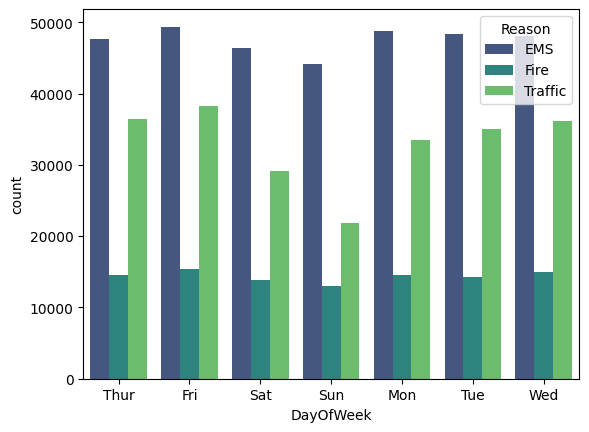

In [66]:
sns.countplot(x='DayOfWeek',data=df,hue='Reason',palette='viridis')

<Axes: xlabel='Month', ylabel='count'>

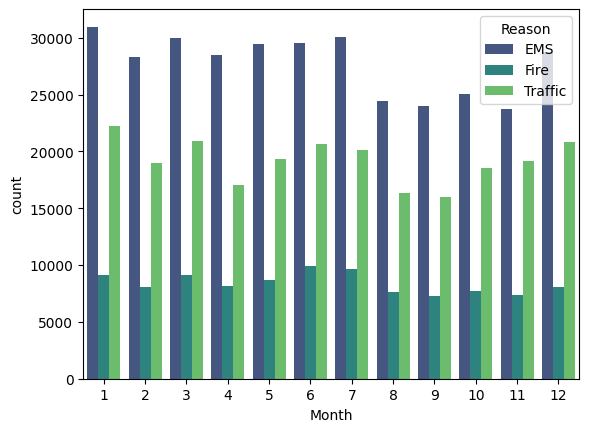

In [67]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

In [68]:
byMonth = df.groupby('Month').count()

In [ ]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


<Axes: xlabel='Month'>

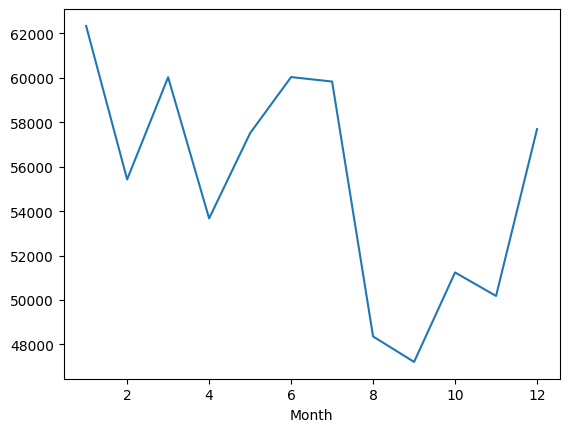

In [71]:
byMonth['lat'].plot()

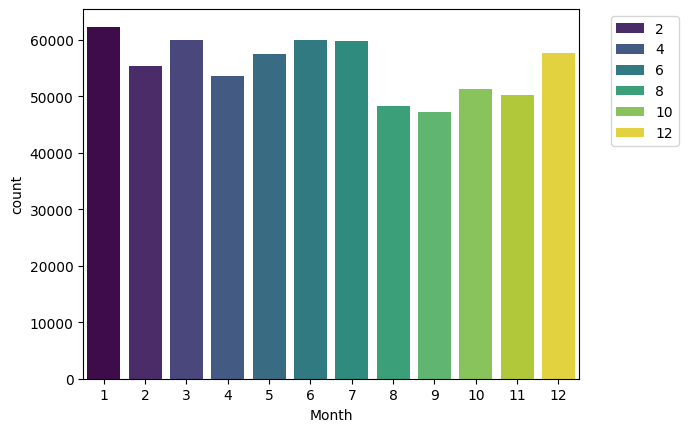

In [76]:
sns.countplot(x="Month",data=df,hue='Month',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

#### use Seaborn implot() to create a linear fit on the number of calls per month. 

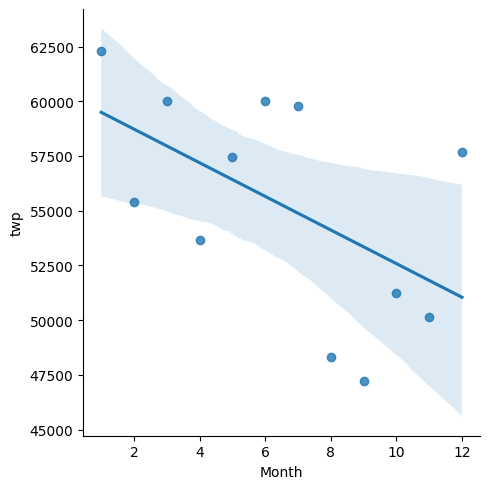

In [ ]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

#### Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method

In [81]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [82]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10


#### Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

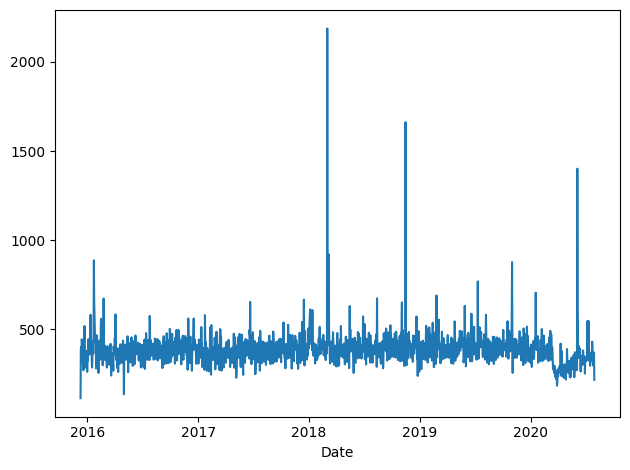

In [86]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

#### Recreate the same plots with Reasons

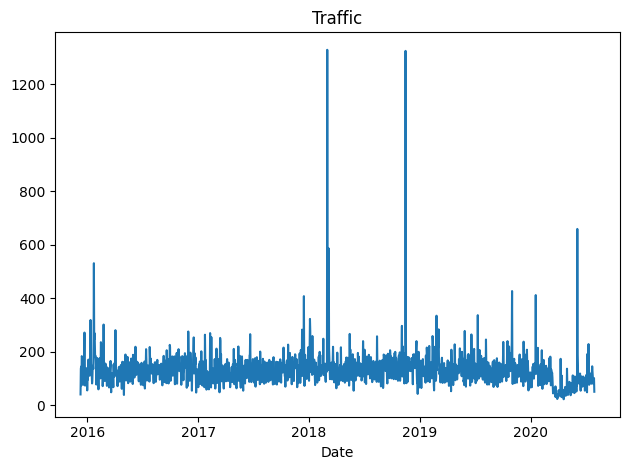

In [87]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

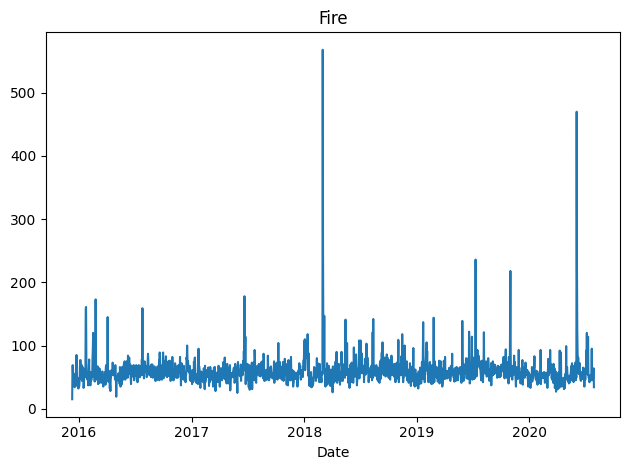

In [88]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

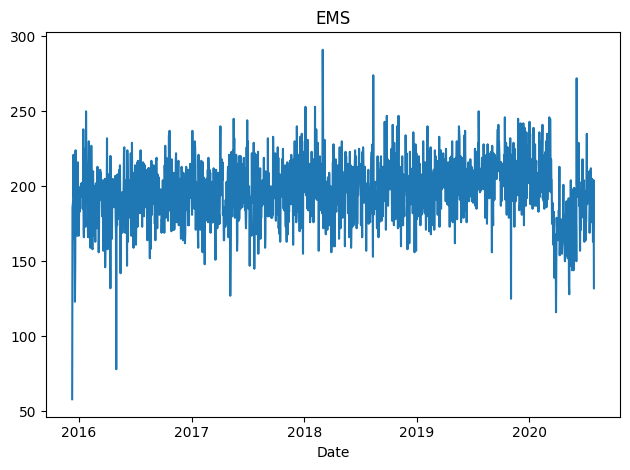

In [89]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

#### Now create the heatmaps with seaborn 

In [96]:
dayHour=df.groupby(by=['DayOfWeek',"Hour"]).count()['Reason'].unstack()

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

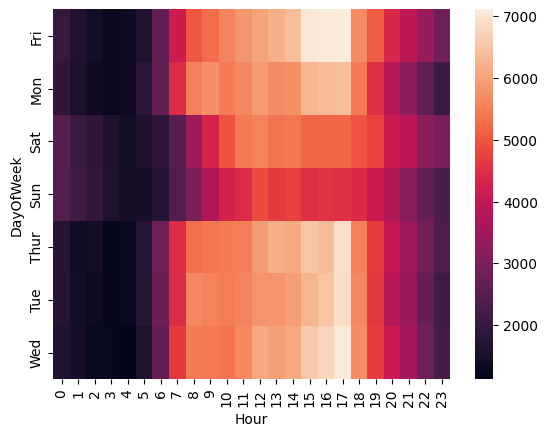

In [97]:
sns.heatmap(dayHour)